# nmi | 2024 spring
## lecture 05 : systems of equations : gauss elimination, PA=LU factorization


why stop at one?
</br>


### 2.1 gaussian elimination


##### ex 01


consider system of equations
</br></br>

\begin{align}
  2x - 2y - z &= -2 \\
  4x + y - 2z &= 1 \\
  -2x + y -z &= -3. \\
\end{align}
</br>

three equations and three unknowns $\Rightarrow$ mosh those equations to solve for $z$; use $z$ to solve for $y$; use $z,y$ to solve for $x$.
</br>


in an orderly, pre-algorithm kind of way,
</br></br>

$$
Ax =b \Rightarrow
\underbrace{
\begin{bmatrix}
  a_{11} & a_{12} & a_{13} \\
  a_{21} & a_{22} & a_{23} \\
  a_{31} & a_{32} & a_{33}
\end{bmatrix}
\begin{bmatrix} x \\ y \\ z \end{bmatrix}
=
\begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}
}_{\text{more writing}}
\Rightarrow
\underbrace{
\left[\begin{array}{r}
  a_{11} & a_{12} & a_{13} & | & b_1 \\
  a_{21} & a_{22} & a_{23} & | & b_2 \\
  a_{31} & a_{32} & a_{33} & | & b_3
\end{array}\right]
}_{\text{less writing = yay}}
$$
</br>

where $a_{ij}$, $b_i$ represents elements at row $i$ and column $j$.
</br>



to "solve for $z$ then $y$ then $x$", get the structure to look like this,
</br></br>

$$
\begin{bmatrix}
  a_{11} & a_{12} & a_{13} \\
  0 & a'_{22} & a'_{23} \\
  0 & 0 & a'_{33}
\end{bmatrix}
\begin{bmatrix} x \\ y \\ z \end{bmatrix}
=
\begin{bmatrix} b_1 \\ b'_2 \\ b'_3 \end{bmatrix}
\sim
\left[\begin{array}{r}
  a_{11} & a_{12} & a_{13} & | & b_1 \\
  0 & a'_{22} & a'_{23} & | & b'_2 \\
  0 & 0 & a'_{33} & | & b'_3
\end{array}\right]
$$
</br>

where prime $'$ represents element after modification by <b>forward elimination</b>.
</br>


for the given system of equations,
</br></br>

\begin{align}
  \begin{bmatrix}
    2 & -2 & -1 \\
    4 & 1 & -2 \\
    -2 & 1 & -1
  \end{bmatrix}
  \begin{bmatrix} x \\ y \\ z \end{bmatrix}
  =
  \begin{bmatrix} -2 \\ 1 \\ -3 \end{bmatrix}
  &\Rightarrow
  \left[\begin{array}{r}
    2 & -2 & -1 & | & -2\\
    4 & 1 & -2 & | & 1 \\
    -2 & 1 & -1 & | & -1
  \end{array}\right]
  \Rightarrow
  \left[\begin{array}{r}
    2 & -2 & -1 & | & -2\\
    0 & ? & ? & | & ? \\
    0 & 0 & ? & | & ?
  \end{array}\right]
  \\ \\
  \text{1. subtract row 1 from row 2} \quad &\Rightarrow \text{new [row 2]} = \text{[row 2]} - m\times \text{[row 1], where } m = \frac{a_{21}}{a_{11}} = \frac{4}{2} = 2
  \\ \\
  &\Rightarrow
  \left[\begin{array}{r}
    2 & -2 & -1 & | & -2\\
    4-2(2) & 1-2(-2) & -2-2(-1) & | & 1-2(-2) \\
    -2 & 1 & -1 & | & -1
  \end{array}\right]
  =
    \left[\begin{array}{r}
    2 & -2 & -1 & | & -2\\
    0 & 5 & 0 & | & 5 \\
    -2 & 1 & -1 & | & -1
  \end{array}\right]
  \\ \\
  \text{2. subtract row 1 from row 3} \quad &\Rightarrow \text{new [row 3]} = \text{[row 3]} - m\times \text{[row 1], where } m = \frac{a_{31}}{a_{11}} = \frac{-2}{2} = -1
  \\ \\
  &\Rightarrow
  \left[\begin{array}{r}
    2 & -2 & -1 & | & -2\\
    0 & 5 & 0 & | & 5 \\
    -2+1(2) & 1+1(-2) & -1+1(-1) & | & -1+1(-2)
  \end{array}\right]
  =
    \left[\begin{array}{r}
    2 & -2 & -1 & | & -2\\
    0 & 5 & 0 & | & 5 \\
    0 & -1 & -2 & | & -3
  \end{array}\right]
  \\ \\
  \text{3. subtract row 2 from row 3} \quad &\Rightarrow \text{new [row 3]} = \text{[row 3]} - m\times \text{[row 2], where } m = \frac{a_{32}}{a_{22}} = \frac{-1}{5} = -\frac{1}{5}
  \\ \\
  &\Rightarrow
  \left[\begin{array}{r}
    2 & -2 & -1 & | & -2\\
    0 & 5 & 0 & | & 5 \\
    0 & -1+\frac{1}{5}(5) & -2+\frac{1}{5}(0) & | & -3+\frac{1}{5}(5)
  \end{array}\right]
  =
    \left[\begin{array}{r}
    2 & -2 & -1 & | & -2\\
    0 & 5 & 0 & | & 5 \\
    0 & 0 & -2 & | & -2
  \end{array}\right]
\end{align}
</br>

huzzah, upper triangular matrix. $\checkmark$
</br>


#### 2.1.1 naive gaussian elimination


##### forward elimination


to zero below the diagonal, consider that the columns zeroed are $j = 1$ to $n-1$, where $n = 3 ~$ number of equations, number of unknowns, dimension of $A_{n\times n},b_n$.
</br></br>

```
for j = 1 : n-1
  # eliminate column j
end
```
</br>

for each $j$, the rows to zero below the diagonal are $i=j+1$ to $n$.</br></br>

```
for j = 1 : n-1
  # eliminate column j
  for i = j+1 : n
    # eliminate entry a(i,j)
end
```
</br>

and whats applied to one element in a row (eg, $a_{ij}$) is applied to all elements in that row -- including $b_i$.
</br></br>

```
for j = 1 : n-1
  if abs(a(j,j))<eps; error('zero pivot encountered'); end
  for i = j+1 : n
    mult = a(i,j)/a(j,j);
    for k = j+1:n
      a(i,k) = a(i,k) - mult*a(j,k);
    end
    b(i) = b(i) - mult*b(j);
  end
end
```
</br>

oc this requires that the diagonal not be zero. ie, the diagonal contains the <b>pivots</b> of coefficient matrix $A$.
</br>


##### usw, continuing example 01


$$
  \left[\begin{array}{r}
  2 & -2 & -1 & | & -2\\
  0 & 5 & 0 & | & 5 \\
  0 & 0 & -2 & | & -2
\end{array}\right]
\sim
\left[\begin{array}{r}
  a_{11} & a_{12} & a_{13} & | & b_1 \\
  0 & a'_{22} & a'_{23} & | & b'_2 \\
  0 & 0 & a'_{33} & | & b'_3
\end{array}\right]
\sim
\begin{bmatrix}
  a_{11} & a_{12} & a_{13} \\
  0 & a'_{22} & a'_{23} \\
  0 & 0 & a'_{33}
\end{bmatrix}
\begin{bmatrix} x \\ y \\ z \end{bmatrix}
=
\begin{bmatrix} b_1 \\ b'_2 \\ b'_3 \end{bmatrix}
$$
</br>

to solve for $[x,y,z]^T$,
</br></br>

\begin{align}
  \text{1.} \quad z &= \frac{b'_3}{a'_{33}} \\
  \text{2.} \quad y &= \frac{b'_2 - a'_{23}\cdot z}{a'_{22}} \\
  \text{3.} \quad x &= \frac{b'_1 - a'_{13}\cdot z - a'_{12}\cdot y}{a'_{11}} \\
  \\
  &\Downarrow \\
  \\
  [x,y,z]^T &= [\frac{1}{2},1,1]^T
\end{align}
</br>

no surprises there. more generally, for any $n$...
</br>


##### backward substitution



```
for i = n : -1 : 1
  for j = i+1 : n
    b(i) = b(i) - a(i,j)*x(j);
  end
  x(i) = b(i)/a(i,i);
end
```
</br>


#### 2.1.2 operation counts


consider matrix of coefficients $A$ wrt forward elimination. cost in operations stacks like this:
</br></br>

\begin{bmatrix}
  0 \\ 2n+1 & 0 \\ 2n+1 & 2(n-1)+1 & 0 \\
  2n+1 & 2(n-1)+1 & 2(n-2)+1 & 0 \\
  \vdots & \vdots & \vdots & \ddots & \ddots \\
  2n+1 & 2(n-1)+1 & 2(n-2)+1 & \dots & 2(3)+1 & 0 \\
  2n+1 & 2(n-1)+1 & 2(n-2)+1 & \dots & 2(3)+1 & 2(2)+1 & 0 \\
\end{bmatrix}
</br>

where $n$ is dimension of $A_{n\times n},b_n$ and each cell contains the cost in operations to zero its value.
</br></br>

eg, for $a'_{21} = 0 = a_{21} - a_{11}\cdot\frac{a_{21}}{a_{11}} \sim$ 3 operations but also consider every cell in that same row that gets refactored by the same $m$. so $2n + 1$ where "$2$" is the subtraction and multiplication, "$n$" is the number of cells in that row that need attention (includes $b_i$) and "$+1$" is the cost of the single division required to evaluate $m$ for that row.
</br>


<b><font color=grey>lem 01</font></b> for any positive integer $n$, (a) $1 + 2 + 3 + \dots + n = n(n+1)/2$ and (b) $1^2 + 2^2 + 3^2 + \dots + n^2 = n(n+1)(2n+1)/6$.
</br></br>

<i>in case of homework...</i>
</br>


to sum,
</br></br>

\begin{align}
  \sum_{j=1}^{n-1} \sum_{i=1}^{j} 2(j+1)+1 &= \sum_{j=1}^{n-1} 2j(j+1)+j \\
  &= 2\sum_{j=1}^{n-1}j^2 + 3\sum_{j=1}^{n-1}j = 2\frac{(n-1)n(2n-1)}{6} + 3\frac{(n-1)n}{2} \\
  &= (n-1)n\left[ \frac{2n-1}{3} + \frac{3}{2} \right] = \frac{n(n-1)(4n+7)}{6} \\
  &= \frac{2}{3}n^3 + \frac{1}{2}n^2 - \frac{7}{6}n.
\end{align}
</br>


the cost of back substitution is $n^2 \sim \mathcal{O}(n^2)$ vs $\mathcal{O}(n^3)$ for forward elimination.
</br></br>

<i>big O refresher</i>: [@wiki](https://en.wikipedia.org/wiki/Big_O_notation) [@brightside](https://www.youtube.com/watch?v=vEUnVm2k2-k) (4 minutes!)
</br>


### 2.2 LU factorization


#### 2.2.1 matrix form of guassian elimination


LU factorization splits coefficient matrix $A$ into <b>lower triangular</b> and <b>upper triangular</b> matrices such that
</br></br>

$$[L][U] = [A]$$
</br>

where entries of $L_{m\times n}$ satisfy $l_{ij} = 0$ for $i<j$ and entries of $U_{m\times n}$ statisy $u_{ij} = 0$ for $i>j$.
</br>


##### ex 04


$$
LU =
\begin{bmatrix} 1 & 0 \\ 3 & 1 \end{bmatrix}
\begin{bmatrix} 1 & 1 \\ 0 & -7 \end{bmatrix}
=
\begin{bmatrix} 1 & 1 \\ 3 & -4 \end{bmatrix}
= A.
$$
</br>

##### ex 05


consider matrix of coefficients,
</br></br>

$$
A = \begin{bmatrix} 1 & 2 & -1 \\ 2 & 1 & -2 \\ -3 & 1 & 1 \end{bmatrix}
$$
</br>

apply forward elimination on $A$ to get upper triangular $U$; however, store the $m$ used in each step in $L$. ie,
</br></br>

\begin{align} \\
\text{0. start with }L = I,U=A \qquad &
\\ \\
\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
&
\begin{bmatrix} 1 & 2 & -1 \\ 2 & 1 & -2 \\ -3 & 1 & 1 \end{bmatrix}
\\ \\
\text{1. subtract row 1 from row 2} \quad &\Rightarrow \text{new [row 2]} = \text{[row 2]} - m\times \text{[row 1], where } m = \frac{a_{21}}{a_{11}} = \frac{2}{1} = 2 \\
&\Rightarrow l_{ij} = m \text{ where }i = \text{ [row to zero]} = 2 \text{, }j = \text{[row to zero with] = 1}
\\ \\
\begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
&
\begin{bmatrix} 1 & 2 & -1 \\ 0 & -3 & 0 \\ -3 & 1 & 1 \end{bmatrix}
\\ \\
\text{2. subtract row 1 from row 3} \quad &\Rightarrow \text{new [row 3]} = \text{[row 3]} - m\times \text{[row 1], where } m = \frac{a_{31}}{a_{11}} = \frac{-3}{1} = -3 \\
&\Rightarrow l_{ij} = m \text{ where }i = \text{ [row to zero]} = 3 \text{, }j = \text{[row to zero with] = 1}
\\ \\
\begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ -3 & 0 & 1 \end{bmatrix}
&
\begin{bmatrix} 1 & 2 & -1 \\ 0 & -3 & 0 \\ 0 & 7 & -2 \end{bmatrix}
\\ \\
\text{3. subtract row 2 from row 3} \quad &\Rightarrow \text{new [row 3]} = \text{[row 3]} - m\times \text{[row 2], where } m = \frac{a_{32}}{a_{22}} = \frac{7}{-3} = -\frac{7}{3} \\
&\Rightarrow l_{ij} = m \text{ where }i = \text{ [row to zero]} = 3 \text{, }j = \text{[row to zero with] = 2}
\\ \\
\begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ -3 & -\frac{7}{3} & 1 \end{bmatrix}
&
\begin{bmatrix} 1 & 2 & -1 \\ 0 & -3 & 0 \\ 0 & 0 & -2 \end{bmatrix}
= LU.
\end{align}
</br>

$$
\Rightarrow LU =
\begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ -3 & -\frac{7}{3} & 1 \end{bmatrix}
\begin{bmatrix} 1 & 2 & -1 \\ 0 & -3 & 0 \\ 0 & 0 & -2 \end{bmatrix}
=
\begin{bmatrix} 1 & 2 & -1 \\ 2 & 1 & -2 \\ -3 & 1 & 1 \end{bmatrix}
= A. \checkmark
$$
</br>

#### 2.2.2 back substitution with LU factorization


$Ax = b \Rightarrow LUx = b$. let $c = Ux$. then back substitution becomes
</br></br>

a) solve $Lc = b$ for $c$;
</br>
b) solve $Ux = c$ for $x$.
</br>


#### 2.2.3 complexity of LU factorization


why do this? bc classical guassian elimination includes vector $b_n$ in forward elimination, the more expensive part of the process. if $n$ is large, that cost is significant.
</br>


### 2.3 error


beware poorly conditioned coefficient matrices; beware swamping.
</br>


#### 2.3.1 error magnification and condition number


<b><font color=grey>def 2.3</font></b> <b>infinity norm</b> of $\vec{x}, ||x||_{\infty} = \text{max} |x_i|, i = 1,\dots,n$.
</br></br>

<b><font color=grey>def 2.4</font></b> let $x_a$ be approximate solution of linear system $Ax = b$. then <b>residual</b> $\vec{r} = b-Ax_a$. <b>backward error</b> $= ||b-Ax_a||_{\infty}$ and <b>forward error</b> $=||x-x_a||_{\infty} \sim$ bc this is root-finding.
</br>


##### rant



so. if you math kids go to the dark side and work as or for engineers, you might see some $y=f(x)$ or $g(x) = y-f(x)$ and maybe $g(x) = 0$. is input $x$? or is input $y$? and does that change if your overseer says its an [inverse problem](https://en.wikipedia.org/wiki/Inverse_problem)? your pack will let you know; if they dont, im sorry, but you work for [?!].
</br>


##### ex 11


calculate forward and backwards errors for approximate solution $x_a = [-1,3.0001]^T$ to system
</br></br>

\begin{align}
  x_1 + x_2 &= 2 \\
  1.0001x_1 + x_2 &= 2.0001.
\end{align}
</br>

by gauss elimination, $x^* = [1,1]^T$. so
</br></br>

\begin{align}
  b-Ax_x &= \begin{bmatrix} 2 \\ 2.0001 \end{bmatrix} - \begin{bmatrix} 1 & 1 \\ 1.0001 & 1 \end{bmatrix}\begin{bmatrix} -1 \\ 3.0001 \end{bmatrix} = \begin{bmatrix} -0.0001 \\ 0.0001 \end{bmatrix} \Rightarrow ||b-Ax_a||_{\infty} = 0.0001 \\
  \\
  x-x_a &= \begin{bmatrix} 1 \\ 1 \end{bmatrix} - \begin{bmatrix} -1 \\ -3.0001 \end{bmatrix} = \begin{bmatrix} 2 \\ -2.0001 \end{bmatrix} \Rightarrow ||x-x_a||_{\infty} = 2.0001
\end{align}
</br>


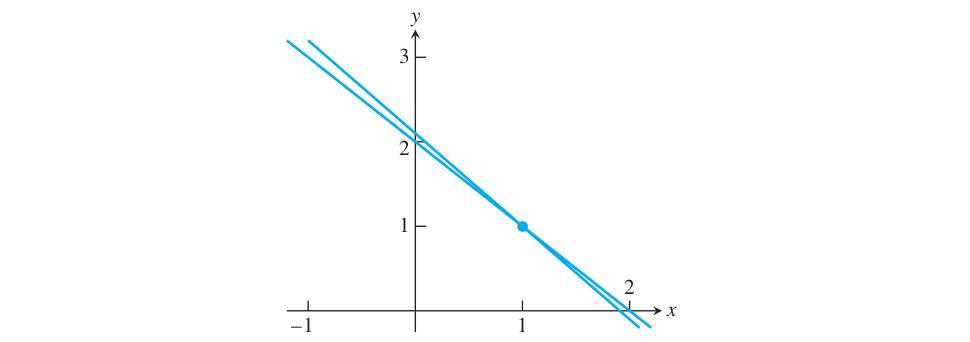

###### lol

its really too close together for me to zero in on.
</br>


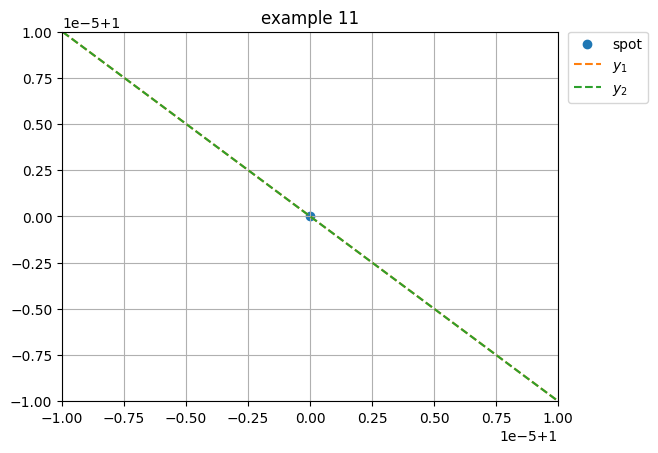

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

#y1 = lambda x : 2 - x
def y1(x):
  n = len(x)
  y = [0]*n
  for i in range(len(x)):
    y[i] = 2 - x[i]
  return y
#y2 = lambda x : 2.0001 - 1.00001*x
def y2(x):
  n = len(x)
  y = [0]*n
  for i in range(len(x)):
    y[i] = 2.0001 - 1.0001*x[i]
  return y

xs = [-1,2]
ys_1 = y1(xs)
ys_2 = y2(xs)

# plot, set data
plt.scatter([1],[1],c="C0",label="spot")
plt.plot(xs,ys_1,c="C1",linestyle="--",label="$y_1$")
plt.plot(xs,ys_2,c="C2",linestyle="--",label="$y_2$")

# plot, set style
plt.grid()
plt.title("example 11")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.ylabel("")
#plt.xlabel("")
plt.axis([0.99999,1.00001,0.99999,1.00001])

# plot, show
plt.show()


##### usw


that sort of thing happens when the approximation and the solution exist on nearly parallel lines.
</br>


also, the relative errors,
</br></br>

$$\text{relative backward }=\frac{||r||_{\infty}}{||b||_{\infty}}, \text{relative forward} =\frac{||x-x_a||_{\infty}}{||x||_{\infty}}.$$
</br>

<b>error magnification</b> $= \frac{\text{relative forward}}{\text{relative backward}} = \frac{\frac{||x-x_a||_{\infty}}{||x||_{\infty}}}{\frac{||r||_{\infty}}{||b||_{\infty}}}$.
</br>


for example 11, error magnifcation $= \frac{\frac{2.0001}{1}}{\frac{0.0001}{2.0001}} \approx \frac{200\%}{0.005\%} = 40004.0001 = $ LOL.
</br>


<b><font color=grey>def 2.5</font></b> <b>condition number</b> of square matrix $A$, <b>cond</b>(A) is maximum possible error magnification factor for solving $Ax=b$ over all RHS $b$.
</br></br>

<b>matrix norm</b> of $A_{n\times n}$: $||A||_{\infty} =$ maximum absolute row sum. ie, total absolute values of each row, assign maximum of these $n$ numbers to be norm of $A$.
</br>


<b><font color=grey>th 2.6</font></b> condition number of $n\times n$ matrix $A$ is
</br></br>

$$\text{cond}(A) = ||A||\cdot||A^{-1}||.$$
</br>


for example 11,
</br></br>

\begin{align}
  ||A|| &= 2.0001 \\
  \\
  A^{-1} &= \begin{bmatrix} -10000 & 10000 \\ 10001 & -10000 \end{bmatrix} \\
  &\Downarrow \\
  ||A^{-1}|| &= 20001 \\
  &\Downarrow \\
  \text{cond}(A) &= (2.0001)(20001) = 40004.0001 = \text{error magnification}.
\end{align}
</br>


#### 2.3.2 swamping


##### ex 13


consider system of equations
</br></br>

\begin{align}
  10^{-20}x_1 + x_2 &= 1 \\
  x_1 + 2x_2 &= 4.
\end{align}
</br>


a) human flywheel
</br></br>

\begin{align}
  \begin{bmatrix} 10^{-20} & 1 & | & 1 \\ 1 & 2 & | & 4 \end{bmatrix}
  &\xrightarrow{\text{subtract }10^{20}\times\text{row 1}\text{ from row 2}}
  \begin{bmatrix} 10^{-20} & 1 & | & 1 \\ 0 & 2-10^{20} & | & 4-10^{20} \end{bmatrix} \\
  \\
  &\quad\Downarrow \\ \\
\end{align}
\begin{align}
  \left.\begin{array}{cl}
  (2-10^{20})x_2 = 4-10^{20} &\Rightarrow x_2 = \frac{4-10^{20}}{2 - 10^{20}} \\
  10^{-20}x_1 + \frac{4-10^{20}}{2 - 10^{20}} = 1 &\Rightarrow x_1 = 10^{20}\left( 1 - \frac{4-10^{20}}{2 - 10^{20}} \right) = \frac{-2\times 10^20}{2-10^{20}}
  \end{array} \quad\right\}\quad \Rightarrow\quad
  [x_1,x_2] \approx [2,1].
\end{align}
</br>


b) breaking the machine
</br></br>

with IEEE double precision,
</br></br>

\begin{align}
  \begin{bmatrix} 10^{-20} & 1 & | & 1 \\ 1 & 2 & | & 4 \end{bmatrix}
  &\rightarrow
  \begin{bmatrix} 10^{-20} & 1 & | & 1 \\ 0 & 2-10^{20} & | & 4-10^{20} \end{bmatrix}
  \xrightarrow{2,4 \text{ vs }10^{20} \text {, lost to rounding}}
  \begin{bmatrix} 10^{-20} & 1 & | & 1 \\ 0 & -10^{20} & | & -10^{20} \end{bmatrix}
  \\ \\
  &\qquad\qquad\Downarrow \\ \\
\end{align}
\begin{align}
  \left.\begin{array}{cl}
  -10^{20}x_2 = -10^{20} &\Rightarrow x_2 = 1 \\
  10^{-20}x_1 + 1 = 1 &\Rightarrow x_1 = 0 \\
  \end{array} \quad\right\} \quad\Rightarrow\quad
  [x_1,x_2] = [0,1].
\end{align}
</br>


c) compensating
</br></br>

with IEEE double precision and row exchange,
</br></br>

\begin{align}
  \begin{bmatrix} 1 & 2 & | & 4 \\ 10^{-20} & 1 & | & 1 \end{bmatrix}
  \xrightarrow{\text{subtract }10^{-20}\times \text{ row 1 from row 2}}
  &\begin{bmatrix} 1 & 2 & | & 4 \\ 0 & 1-2\times 10^{-20} & | & 1-4\times 10^{-20} \end{bmatrix}
  \xrightarrow{\text{rounding}}
  \begin{bmatrix} 1 & 2 & | & 4 \\ 0 & 1 & | & 1 \end{bmatrix}
  \\ \\
  &\quad\Downarrow \\ \\
\end{align}
\begin{align}
  \left.\begin{array}{cl}
  x_1 + 2x_2 = 4 &\Rightarrow x_1 = 2 \\
  x_2 = 1 &\Rightarrow x_2 = 1 \\
  \end{array} \quad\right\} \quad\Rightarrow\quad
  [x_1,x_2] = [2,1] \text{ to about 16 significant digits}.
\end{align}
</br>


ie, for gauss elimination, multipliers should be kept as small to avoid swamping.
</br>


### 2.4 PA-LU factorization


gauss so far has been "naive" bc it doesnt do much about zeros on the diagonal and theres that swamping thing. moving stuff around helps.
</br>


#### 2.4.1 partial pivoting


<b>partial pivoting</b> refers to comparing numbers before each elimination step and swapping the row with the larger first entry towards the top.
</br></br>

ie, select $p$th row, where
</br></br>

$$|a_{p1}| \ge |a_{i1}|$$
</br>

for all $1\le i\le n$ and exchange rows $1$ and $p$. then use the new $a_{11}$ to eliminate column $1$ as usual. ie,
</br></br>

$$m_{i1} = \frac{a_{i1}}{a_{11}} \text{ and } |m_{i1}| \le 1.$$
</br>

apply same to every pivot during the algorithm. when deciding the second pivot, $a_{22}$ will be compared with entries lower than it,
</br></br>

$$|a_{p2}| \ge |a_{i2}|$$
</br>

for all $2\le i\le n$ and exchange rows $2$ and $p$. then use the new $a_{22}$ to eliminate column $2$ as usual.
</br></br>

und so weiter.
</br>


##### ex 15


apply gaussian elimination with partial pivoting to system
</br></br>

\begin{align}
  x_1 - x_2 + 3x_3 &= -3 \\
  -x_1 - 2x_3 &= 1 \\
  2x_1 + 2x_2 + 4x_3 = 0.
\end{align}
</br>


\begin{align}
  &\begin{bmatrix}
    1 & -1 & 3 & | & -3 \\
    -1 & 0 & -2 & | & 1 \\
    2 & 2 & 4 & | & 0
  \end{bmatrix}
  &\xrightarrow{\text{swap row 1 with row 3}}
  &\begin{bmatrix}
    2 & 2 & 4 & | & 0 \\
    -1 & 0 & -2 & | & 1 \\
    1 & -1 & 3 & | & -3
  \end{bmatrix} \\ \\
  &&\xrightarrow{\text{subtract }-\frac{1}{2}\times \text{row 1 with row 2}}
  &\begin{bmatrix}
    2 & 2 & 4 & | & 0 \\
    0 & 1 & 0 & | & 1 \\
    1 & -1 & 3 & | & -3
  \end{bmatrix} \\ \\
  &&\xrightarrow{\text{subtract }\frac{1}{2}\times \text{row 1 with row 3}}
  &\begin{bmatrix}
    2 & 2 & 4 & | & 0 \\
    0 & 1 & 0 & | & 1 \\
    0 & -2 & 1 & | & -3
  \end{bmatrix} \\ \\
  \\
  &\begin{bmatrix}
    2 & 2 & 4 & | & 0 \\
    0 & 1 & 0 & | & 1 \\
    0 & -2 & 1 & | & -3
  \end{bmatrix}
  &\xrightarrow{\text{swap row 2 with row 3}}
  &\begin{bmatrix}
    2 & 2 & 4 & | & 0 \\
    0 & -2 & 1 & | & -3 \\
    0 & 1 & 0 & | & 1
  \end{bmatrix} \\ \\
  &&\xrightarrow{\text{subtract }-\frac{1}{2}\times \text{row 2 with row 3}}
  &\begin{bmatrix}
    2 & 2 & 4 & | & 0 \\
    0 & -2 & 1 & | & -3 \\
    0 & 0 & \frac{1}{2} & | & -\frac{1}{2}
  \end{bmatrix} \\
\end{align}
</br>





note: all three multipliers are less than 1 in absolute value.
</br></br>

$$
\left.
\begin{align}
  \frac{1}{2}x_3 &= -\frac{1}{2} \\
  -2x_2 + x_3 &= -3 \\
  2x_1 + 2x_2 + 4x_3 &= 0.
\end{align}
\quad\right\}\quad \Rightarrow x=[1,1,-1]^T.
$$
</br>


#### 2.4.2 permuation matrices


<b><font color=grey>permutation matrix</font></b> is $n\times n$ matrix of all zeros except for a single 1 in every row and column.
</br>


##### <b><font color=grey>th 2.8</font></b> <b>fundamental theorem of permutation matrices</b>


let $P$ be $n\times n$ permutation matrix formed by a particular set of row exchanges applied to the identity matrix. then for any $n\times n$ matrix $A$, $PA$ is the matrix obtained by applied exactly the same set of row exchanges to $A$.
</br>


##### usw


eg, permutation matrix
</br></br>

\begin{align}
  \begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix}
\end{align}
</br>

is formed by exchanging rows 2 and 3 of the identity matrix. applying it to another matrix is the same as applying the same row swaps,
</br></br>

\begin{align}
  \begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix}
  \begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix}
  =
  \begin{bmatrix} a & b & c \\ g & h & i \\ d & e & f \end{bmatrix}
  .
\end{align}
</br>


#### 2.4.3 PA=LU factorization


the sum of gaussian elimination, hooray.
</br></br>

</however>
</br></br>


##### ex 16


find PA=LU factorization of matrix
</br></br>

\begin{align}
  A =
  &\begin{bmatrix} 2 & 1 & 5 \\ 4 & 4 & -4 \\ 1 & 3 & 1 \end{bmatrix}
  &\Rightarrow PA = LU
  \qquad\qquad\qquad\qquad\qquad\qquad\qquad
  \\ \\ \\
  IA=
  \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
  &\begin{bmatrix} 2 & 1 & 5 \\ 4 & 4 & -4 \\ 1 & 3 & 1 \end{bmatrix}
  &\xrightarrow{\text{swap row 1 with row 2}}
  \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix}
  \begin{bmatrix} 2 & 1 & 5 \\ 4 & 4 & -4 \\ 1 & 3 & 1 \end{bmatrix}
  =
  \begin{bmatrix} 4 & 4 & -4 \\ 2 & 1 & 5 \\ 1 & 3 & 1 \end{bmatrix}
  &\sim P_1A = A_1
  \\ \\ \\
  &&\xrightarrow{\text{mod row 2 with row 1}}
  \begin{bmatrix} 4 & 4 & -4 \\ \color{red}{\frac{1}{2}} & -1 & 7 \\ 1 & 3 & 1 \end{bmatrix}
  \sim
  \begin{bmatrix} 1 & 0 & 0 \\ \color{red}{\frac{1}{2}} & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
  \begin{bmatrix} 4 & 4 & -4 \\ 0 & -1 & 7 \\ 1 & 3 & 1 \end{bmatrix}
  &\sim L_1U_1
  \\ \\
  &&\xrightarrow{\text{mod row 3 with row 1}}
  \begin{bmatrix} 4 & 4 & -4 \\ \color{red}{\frac{1}{2}} & -1 & 7 \\ \color{blue}{\frac{1}{4}} & 2 & 2 \end{bmatrix}
  \sim
  \begin{bmatrix} 1 & 0 & 0 \\ \color{red}{\frac{1}{2}} & 1 & 0 \\ \color{blue}{\frac{1}{4}} & 0 & 1 \end{bmatrix}
  \begin{bmatrix} 4 & 4 & -4 \\ 0 & -1 & 7 \\ 0 & 2 & 2 \end{bmatrix}
  &\sim L_2U_2
  \\ \\ \\
  P_1A =
  \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix}
  &\begin{bmatrix} 2 & 1 & 5 \\ 4 & 4 & -4 \\ 1 & 3 & 1 \end{bmatrix}
  &\xrightarrow{\text{swap row 2 with row 3}}
  \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \end{bmatrix}
  \begin{bmatrix} 2 & 1 & 5 \\ 4 & 4 & -4 \\ 1 & 3 & 1 \end{bmatrix}
  =
  \begin{bmatrix} 4 & 4 & -4 \\ 1 & 3 & 1 \\ 2 & 1 & 5 \end{bmatrix}
  &\sim P_2A = PA = A_2
  \\ \\ \\
  L_2U_2 =
  \begin{bmatrix} 1 & 0 & 0 \\ \color{red}{\frac{1}{2}} & 1 & 0 \\ \color{blue}{\frac{1}{4}} & 0 & 1 \end{bmatrix}
  \begin{bmatrix} 4 & 4 & -4 \\ 0 & -1 & 7 \\ 0 & 2 & 2 \end{bmatrix}
  \sim
  &\begin{bmatrix} 4 & 4 & -4 \\ \color{red}{\frac{1}{2}} & -1 & 7 \\ \color{blue}{\frac{1}{4}} & 2 & 2 \end{bmatrix}
  &\xrightarrow{\text{swap row 2 with row 3}}
  \begin{bmatrix} 4 & 4 & -4 \\ \color{blue}{\frac{1}{4}} & 2 & 2 \\ \color{red}{\frac{1}{2}} & -1 & 7 \end{bmatrix}
  \sim
  \begin{bmatrix} 1 & 0 & 0 \\ \color{blue}{\frac{1}{4}} & 1 & 0 \\ \color{red}{\frac{1}{2}} & 0 & 1 \end{bmatrix}
  \begin{bmatrix} 4 & 4 & -4 \\ 0 & 2 & 2 \\ 0 & -1 & 7 \end{bmatrix}
  &\sim L_3U_3
  \\ \\
  &&\xrightarrow{\text{mod row 3 with row 2}}
  \begin{bmatrix} 4 & 4 & -4 \\ \color{blue}{\frac{1}{4}} & 2 & 2 \\ \color{red}{\frac{1}{2}} & \color{orange}{-\frac{1}{2}} & 2 \end{bmatrix}
  \sim
  \begin{bmatrix} 1 & 0 & 0 \\ \color{blue}{\frac{1}{4}} & 1 & 0 \\ \color{red}{\frac{1}{2}} & \color{orange}{-\frac{1}{2}} & 1 \end{bmatrix}
  \begin{bmatrix} 4 & 4 & -4 \\ 0 & 2 & 2 \\ 0 & 0 & 8 \end{bmatrix}
  &\sim L_4U_4 = LU
\end{align}
</br>




##### usw


the LU factorization for PA=LU now becomes,
</br></br>

$$
\left.
  \begin{array}{cl}
    PAx &= Pb \\
    LUx &= Pb
  \end{array}
\quad\right\}\quad
\xrightarrow{solve} \quad\quad
\begin{array}{cl}
  \text{1. }& Lc = Pb \text{ for } c \\
  \text{2. }& Ux = c \text{ for } x.
\end{array}
$$
</br>


##### ex 17


use PA=LU factorization to solve system $Ax = b$, where
</br></br>

$$
A = \begin{bmatrix} 2 & 1 & 5 \\ 4 & 4 & -4 \\ 1 & 3 & 1 \end{bmatrix},
b = \begin{bmatrix} 5 \\ 0 \\ 6 \end{bmatrix}.
$$

1. solve $Lc = Pb$,
</br></br>

\begin{align}
  \begin{bmatrix}
    1 & 0 & 0 \\
    \frac{1}{4} & 1 & 0 \\
    \frac{1}{2} & -\frac{1}{2} & 1
  \end{bmatrix}
  \begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix}
  =
  \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \end{bmatrix}
  \begin{bmatrix} 5 \\ 0 \\ 6 \end{bmatrix}
  =
  \begin{bmatrix} 0 \\ 6 \\ 5 \end{bmatrix}
\end{align}
</br>

starting at the top,
</br></br>

$$
\left.
\begin{array}{rl}
  c_1 &= 0 \\
  \frac{1}{4}(0) + c_2 &= 6 \Rightarrow c_2 = 6 \\
  \frac{1}{2}(0) - \frac{1}{2}(6) + c_3 &= 5 \Rightarrow c_3 = 8
\end{array}
\right.
\quad\Rightarrow\quad c=[0,6,8]^T.
$$
</br>

2. solve $Ux = c$,
</br></br>

\begin{align}
  \begin{bmatrix}
    4 & 4 & -4 \\
    0 & 2 & 2 \\
    0 & 0 & 8
  \end{bmatrix}
  \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}
  =
  \begin{bmatrix} 0 \\ 6 \\ 8 \end{bmatrix}
\end{align}
</br>

starting at the bottom,
</br></br>

$$
\left.
\begin{array}{rl}
  8x_3 &= 8 \Rightarrow x_3 = 1 \\
  2x_2 + 2(1) &= 6 \Rightarrow x_2 = 2 \\
  4x_1 + 4(2) - 4(1) &= 0 \Rightarrow x_1 = -1
\end{array}
\right.
\quad\Rightarrow\quad x=[-1,2,1]^T.
$$
</br>



</br></br></br></br></br>
</br></br></br></br></br>
colab, alles ausdrucken, bitte.
</br>
